# ライブラリのdatasetを使う

In [13]:
from pycaret.datasets import get_data
boston_data = get_data("boston")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 前処理
* brew install libompがないとエラーが発生

In [14]:
from pycaret.regression import *
exp1 = setup(boston_data, target = 'medv')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4317
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(506, 14)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# モデルの精度比較
#### MAE 平均誤差
#### MSE 平均二乗誤差
#### RMSE 二乗平均平方根誤差

In [15]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.171900,10.348300,3.086900,0.867800,0.137400,0.109500
1,CatBoost Regressor,2.209100,11.779100,3.221000,0.856000,0.143200,0.111100
2,Gradient Boosting Regressor,2.231300,12.244900,3.334500,0.844800,0.147600,0.114600
3,Extreme Gradient Boosting,2.319900,13.494200,3.502300,0.827000,0.156200,0.119500
4,Random Forest,2.339100,13.893900,3.548800,0.822200,0.156600,0.120600
5,AdaBoost Regressor,2.679800,15.037600,3.714300,0.814100,0.173600,0.143000
6,Light Gradient Boosting Machine,2.464800,14.697600,3.690800,0.805000,0.162300,0.123700
7,Decision Tree,3.014700,21.353600,4.390700,0.703100,0.200100,0.153200
8,Random Sample Consensus,3.160800,24.040100,4.693200,0.701100,0.264700,0.153900
9,Ridge Regression,3.290400,23.970700,4.713000,0.696700,0.249000,0.164600


# モデル生成

In [16]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1291,31.6598,5.6267,0.7033,0.2062,0.1556
1,1.8363,5.9549,2.4403,0.9291,0.1279,0.1051
2,2.7781,12.0197,3.4670,0.8979,0.1656,0.1480
3,2.1445,7.3711,2.7150,0.8264,0.1535,0.1306
4,2.3304,16.1279,4.0160,0.6966,0.1743,0.1287
5,2.6231,28.4577,5.3346,0.7610,0.1684,0.0997
6,2.0150,6.1289,2.4757,0.7978,0.1211,0.0984
7,2.7551,17.2550,4.1539,0.7868,0.1696,0.1284
8,1.7566,5.6228,2.3713,0.9120,0.1476,0.1128
9,2.0222,8.3413,2.8881,0.9108,0.1321,0.0987


# モデルパラメーター

In [9]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=3220, verbose=0, warm_start=False)

# チューニング

In [19]:
tune_model = tune_model('rf')


TypeError: 'RandomForestRegressor' object is not callable

In [18]:
print(tune_model.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=90, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=4317, verbose=0, warm_start=False)>


# モデルの精度の可視化

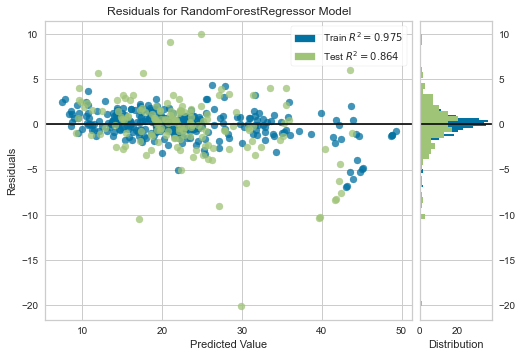

In [20]:
plot_model(tune_model)

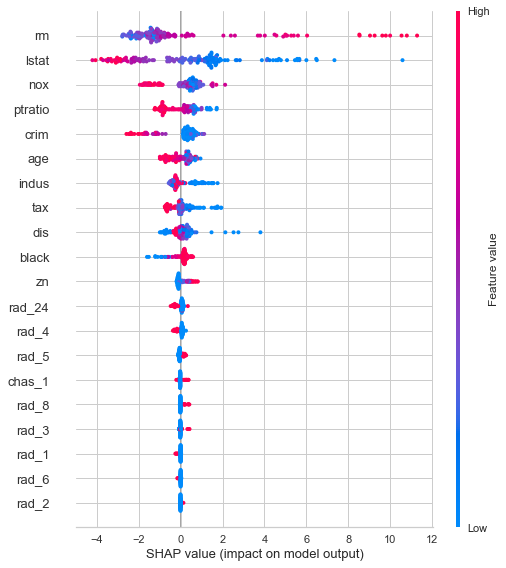

In [21]:
interpret_model(tune_model)

In [23]:
rf_holdout_pred = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.2925,11.7328,3.4253,0.8712,0.1433,0.1072


In [24]:
predictions = predict_model(model, data=boston_data)

In [25]:
display(predictions)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.719
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.678
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,35.285
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.226
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,22.899
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,21.397
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,28.795
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,23.937
